## Spaceship Titanic

Hello there!



In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [77]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [80]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [81]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [82]:
df_train.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8292,8856_01,Earth,True,G/1434/P,PSO J318.5-22,28.0,False,0.0,0.0,0.0,0.0,0.0,Teremy Mckinsond,True
1667,1767_03,Europa,False,C/65/S,TRAPPIST-1e,32.0,False,2973.0,3368.0,124.0,57.0,42.0,Coxatik Gleroling,True
2971,3216_02,Earth,True,G/509/S,55 Cancri e,22.0,False,0.0,0.0,0.0,0.0,0.0,Jennyn Haydenzier,True
876,0938_03,Earth,False,G/143/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Tiney Solinez,True
4066,4343_01,Earth,True,G/708/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
2305,2479_01,Earth,True,NaN,PSO J318.5-22,21.0,False,0.0,0.0,0.0,0.0,0.0,Joela Gordanieves,False
5510,5879_01,Mars,True,F/1122/S,TRAPPIST-1e,25.0,False,0.0,0.0,0.0,0.0,0.0,Whark Cooki,True
7963,8508_01,Mars,True,F/1747/P,TRAPPIST-1e,48.0,False,0.0,0.0,0.0,0.0,0.0,Proos Bake,True
2177,2327_01,Europa,False,B/68/P,TRAPPIST-1e,32.0,False,0.0,4106.0,388.0,892.0,2.0,Alyat Oidederval,True
5657,6016_01,Earth,False,E/383/P,TRAPPIST-1e,24.0,False,718.0,0.0,265.0,302.0,384.0,Robyny Gardonadox,False


In [83]:
df_test.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4087,8895_01,Europa,True,C/294/P,TRAPPIST-1e,39.0,NaN,0.0,0.0,0.0,0.0,0.0,Astrak Hossive
3294,7220_01,Europa,False,B/272/S,TRAPPIST-1e,34.0,False,135.0,207.0,0.0,1471.0,876.0,Weino Entenedy
629,1303_01,Earth,False,F/252/S,TRAPPIST-1e,29.0,False,NaN,0.0,430.0,6.0,0.0,Nathy Howenters
966,2017_02,Mars,False,F/389/S,TRAPPIST-1e,NaN,False,664.0,126.0,40.0,11.0,1068.0,Spil Creke
832,1716_01,Mars,False,NaN,TRAPPIST-1e,42.0,False,247.0,0.0,27.0,707.0,32.0,Repart Spane
2080,4507_01,Europa,False,C/141/P,TRAPPIST-1e,50.0,True,0.0,1260.0,0.0,274.0,3129.0,Dirk Slavested
1112,2351_02,Mars,False,F/479/P,TRAPPIST-1e,39.0,False,995.0,0.0,169.0,27.0,0.0,Toats Botie
2727,6005_04,Earth,False,G/978/S,TRAPPIST-1e,42.0,False,1.0,0.0,11.0,1185.0,4326.0,Elody Dickley
2477,5382_02,Europa,True,C/211/S,55 Cancri e,45.0,False,0.0,0.0,0.0,0.0,0.0,Becruxa Cralinal
3450,7532_01,Earth,True,G/1222/S,55 Cancri e,20.0,False,0.0,0.0,0.0,0.0,0.0,Brene Curton


### Data Preprocessing:

#### PassengerId:

Since it is unique for each passenger it is the primary code of the database and we will use ir as the index.

In [84]:
df_train.set_index('PassengerId', inplace = True)

df_test.set_index('PassengerId', inplace = True)

#### HomePlanet:

Home planet of the passenger. We've got 201 nulls in the parameter that we will fill with the mode of the distribution. With one-hot-enconding we make a dataframe with the shape:

| Planet | Earth | Mars | Europa | 
|--------|-------|------|--------|
| Earth | 1 | 0 | 0 |
| Mars  | 0 | 1 | 0 |
| Europa | 0 | 0 | 1 | 


In [85]:
df_train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [86]:
df_train['HomePlanet'].fillna(df_train['HomePlanet'].mode(), inplace = True)

df_test['HomePlanet'].fillna(df_test['HomePlanet'].mode(), inplace = True)

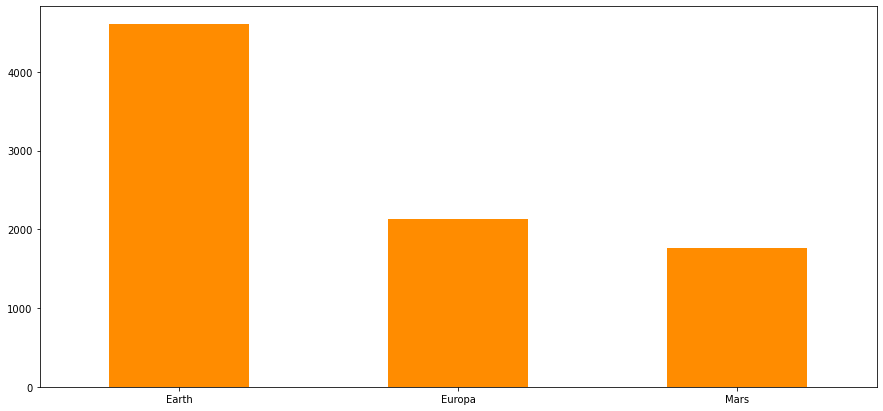

In [87]:
pd.get_dummies(df_train['HomePlanet']).sum().\
    plot.bar(rot=0, color = 'darkorange', figsize = (15, 7));

* Aproximetly the half of the passenger of the Titanic were from planet Earth.

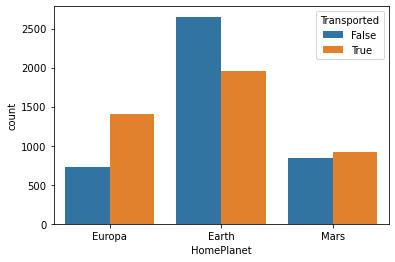

In [88]:
sns.countplot(data=df_train, x='HomePlanet',hue='Transported');  

* Europa's passengers are more likely to be transported than the other passengers.

In [89]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['HomePlanet'])], axis=1).\
    drop(columns={'HomePlanet'}) # Añadimos las variables dummy a la vez que suprimimos la variable HomePlanet.

df_test = pd.concat([df_test, pd.get_dummies(df_test['HomePlanet'])], axis=1).\
    drop(columns={'HomePlanet'}) # Añadimos las variables dummy a la vez que suprimimos la variable HomePlanet.

In [90]:
df_train.head(15)

,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars
PassengerId,,,,,,,,,,,,,,,
0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0
0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0
0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0
0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0
0005_01,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,1,0,0
0006_01,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,1,0,0
0006_02,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,1,0,0
0007_01,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,1,0,0


#### Cryosleep:

Boolean variable, with 217 null values. We will impose that all the passengers with a null value in this parameter weren't cryosleeping. Since most of the passenger weren't cryosleeping we expect that the proportion of passengers cryosleeping and not cryosleeping doesn't change for the sample of the passengers with a null value in this parameter.

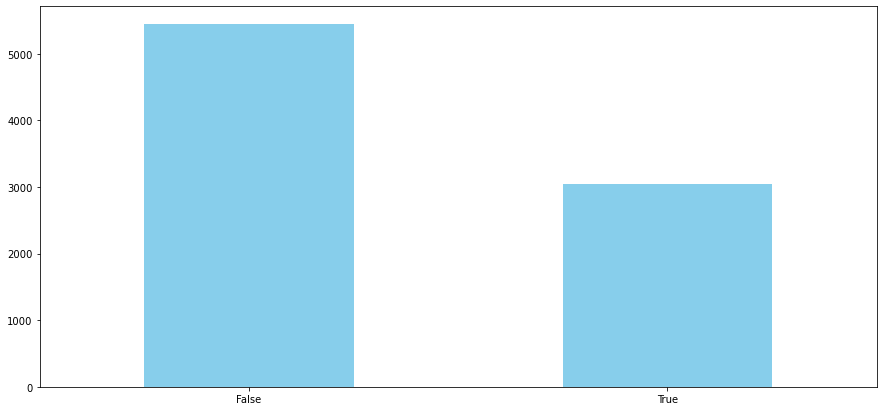

In [91]:
pd.get_dummies(df_train['CryoSleep']).sum().\
    plot.bar(rot=0, color = 'skyblue', figsize = (15, 7));

* Only one third of the passengers were cryosleeping.

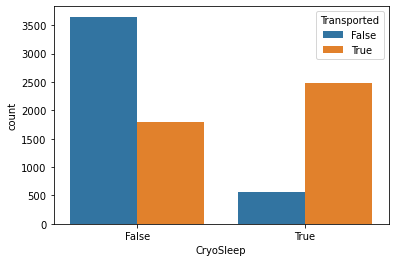

In [92]:
sns.countplot(data=df_train, x='CryoSleep',hue='Transported');  

* But most of them were transportated.

In [93]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['CryoSleep'])], axis=1).\
    rename(columns={True:'cryosleep', False:'no_cryosleeper'}).\
    drop(columns={'CryoSleep', 'no_cryosleeper'}) 

df_test = pd.concat([df_test, pd.get_dummies(df_test['CryoSleep'])], axis=1).\
    rename(columns={True:'cryosleep', False:'no_cryosleeper'}).\
    drop(columns={'CryoSleep', 'no_cryosleeper'}) 
    

#### Cabin

String with the shape *d/num/side*, with 199 null values.

From this cabin parameter we will only look if the cabin of the passenger were on the port *P* or the starboard *S*. Maybe the impact with the wormhole affected more one side of the spaceship.

Since we have null values the first steep is to treat them:

In [94]:
df_train['Cabin'].fillna('x/0/x', inplace = True) # cast the null values to string and the same format as the not null values in order to process them.

df_test['Cabin'].fillna('x/0/x', inplace = True)

In [95]:
df_train['Side'] = [ df_train['Cabin'].str.split('/')[x][2] for x in range(len(df_train)) ] 

df_test['Side'] = [ df_test['Cabin'].str.split('/')[x][2] for x in range(len(df_test)) ] 

In [96]:
# df_train['Side'].

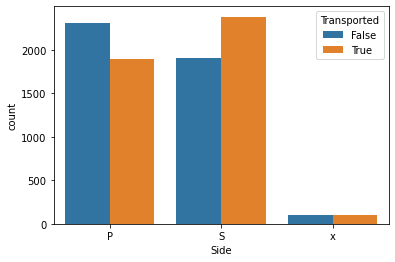

In [97]:
sns.countplot(data=df_train, x='Side',hue='Transported');  

* As we expected the Starboard was more afected by the impact.

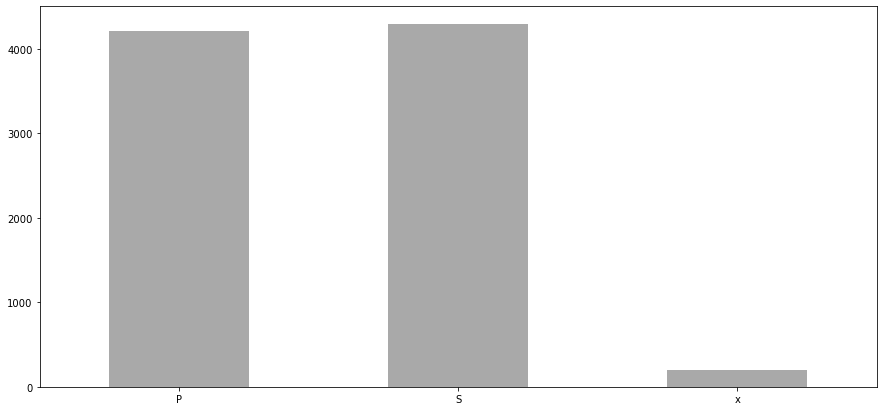

In [98]:
pd.get_dummies(df_train['Side']).sum().\
    plot.bar(rot=0, color = 'darkgrey', figsize = (15, 7));

* We can see how the passengers are well distribuited along the spaceship. If this parameter takes importance to the model we'll demonstrate that the impact affected one side more than the other.

In [99]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Side'])], axis = 1).\
    drop(columns={'Side', 'x', 'Cabin', 'P'}).\
    rename(columns={'S':'starboard_cabin'})

df_test = pd.concat([df_test, pd.get_dummies(df_test['Side'])], axis = 1).\
    drop(columns={'Side', 'x', 'Cabin', 'P'}).\
    rename(columns={'S':'starboard_cabin'})

#### Destination

String with 182 null values. we treat the variable with one-hot-encoding and we will follow the same strategy with the hull values that we applied for *HomePlanet*.

In [100]:
df_train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [101]:
df_train['Destination'].fillna(df_train['Destination'].mode(), inplace = True)
df_test['Destination'].fillna(df_test['Destination'].mode(), inplace = True)

In [102]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Destination'])], axis = 1).\
    drop(columns={'Destination'}).\
    rename(columns={'TRAPPIST-1e':'destination_trappist', 'PSO J318.5-22':'destination_pso', '55 Cancri e':'destination_cancri'})

df_test = pd.concat([df_test, pd.get_dummies(df_test['Destination'])], axis = 1).\
    drop(columns={'Destination'}).\
    rename(columns={'TRAPPIST-1e':'destination_trappist', 'PSO J318.5-22':'destination_pso', '55 Cancri e':'destination_cancri'})

#### Age

In this case we will normalize the variable. To treat the null values we will fill them with random values in the range of our data that don't change the statistical description of our distribution.

We should avoid fill the nulls with just one value like the mean or the median because then the model will take those values more in account. In order to achieve this we will simulate the ages of the passengers that we dont have.

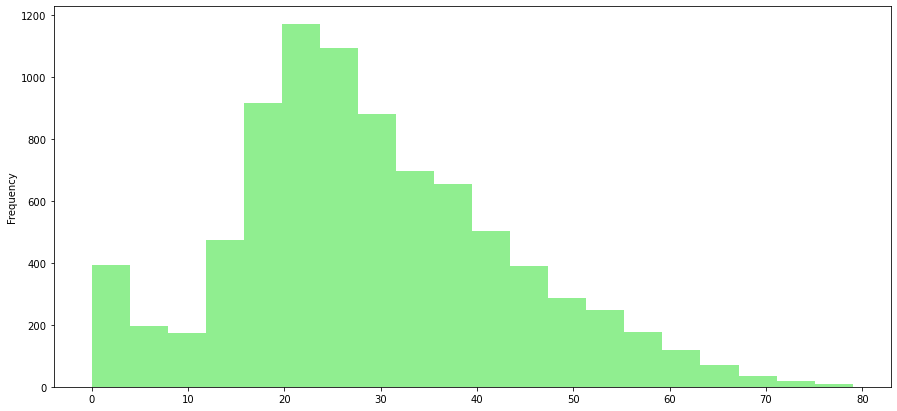

In [103]:
df_train['Age'].plot.hist(bins=20, color='lightgreen', figsize=(15,7));

In [104]:
df_train['Age'].fillna(np.random.normal(df_train['Age'].mean(), df_train['Age'].std()), inplace=True) # We work with a normal distribution without taking in consideration the skewness, unlike the real distribution of ages.

df_test['Age'].fillna(np.random.normal(df_train['Age'].mean(), df_train['Age'].std()), inplace=True) 

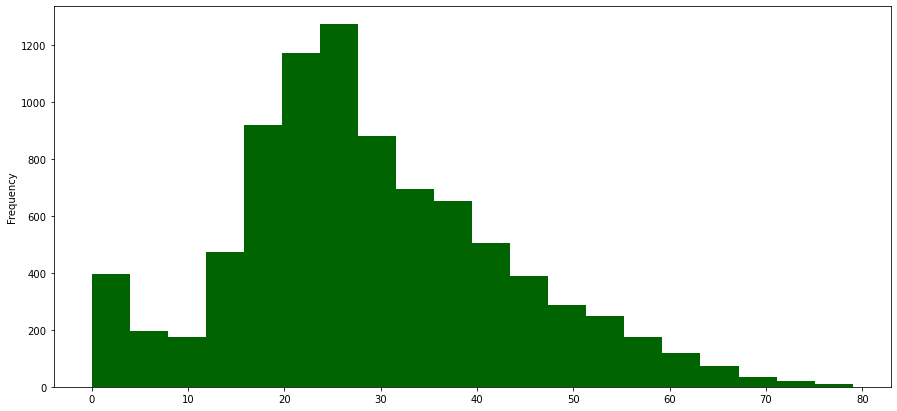

In [105]:
df_train['Age'].plot.hist(bins=20, color='darkgreen', figsize=(15,7));

In [106]:
scaler = MinMaxScaler()

df_train['norm_age'] = scaler.fit_transform(np.array(df_train['Age']).reshape(-1, 1))
df_train.drop(columns={'Age'}, inplace=True)

df_test['norm_age'] = scaler.fit_transform(np.array(df_test['Age']).reshape(-1, 1))
df_test.drop(columns={'Age'}, inplace=True)

#### VIP

As we did with the CryoSleep parameter we create two paramaters from VIP through *get_dummies* function. Since we can see how there are quite less VIP passengers than regular passengers we will assume that all the null values weren't VIP (because it is expected that most of them weren't).

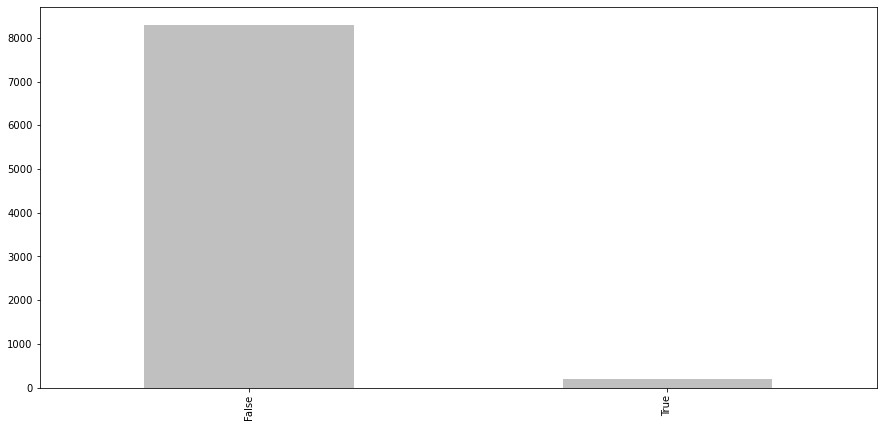

In [107]:
pd.get_dummies(df_train['VIP']).sum().plot.bar(color='silver', figsize=(15,7));

In [108]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['VIP'])], axis = 1).\
    drop(columns={'VIP', False}).\
    rename(columns={True:'VIP'})

df_test = pd.concat([df_test, pd.get_dummies(df_test['VIP'])], axis = 1).\
    drop(columns={'VIP', False}).\
    rename(columns={True:'VIP'})

#### Passenger Luxury Expenses: RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

Since all these variables have the same nature we will treat them equally by creating a parameter as the sum of all of them:

As their name suggest they are luxury expenses so we will follow the next strategy:

* Checking the data we can observe how the VIP have much higher expenses than the rest of the passengers, and it is expected that the passengers who are crysleeping don't have expenses at all. So:

* For the null values in the regular passengers and the passengers who are cryosleeping we will assume that their expenses were 0.

* For the VIP passengers we will take the mean of the VIP as the expected value for the expenses in the null values.

In [109]:
df_train['luxury_expenses'] = df_train['RoomService'] + df_train['FoodCourt'] + df_train['ShoppingMall'] + df_train['Spa'] + df_train['VRDeck']
df_test['luxury_expenses'] = df_train['RoomService'] + df_train['FoodCourt'] + df_train['ShoppingMall'] + df_train['Spa'] + df_train['VRDeck']

df_train.drop(columns={'Name','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'}, inplace = True) # We drop the parameters that won't be part of the training set
df_test.drop(columns={'Name','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'}, inplace = True)

In [110]:
df_train['luxury_expenses'].mask ( (df_train['VIP'] == 1) & (df_train['luxury_expenses']), df_train['luxury_expenses'].loc[df_train['VIP'] == 1].mean(), inplace = True)
df_train['luxury_expenses'].fillna(0., inplace = True) # For the case of the non vip passengers, since most of them didn't spent money in luxury expenses we apply the mode; 0.

df_test['luxury_expenses'].mask ( (df_train['VIP'] == 1) & (df_train['luxury_expenses']), df_train['luxury_expenses'].loc[df_train['VIP'] == 1].mean(), inplace = True)
df_test['luxury_expenses'].fillna(0., inplace = True) # For the case of the non vip passengers, since most of them didn't spent money in luxury expenses we apply the mode; 0.

In [111]:
df_train['norm_luxury_expenses'] = scaler.fit_transform(np.array(df_train['luxury_expenses']).reshape(-1, 1)) # Scaling the values of the expenses too.
df_test['norm_luxury_expenses'] = scaler.fit_transform(np.array(df_test['luxury_expenses']).reshape(-1, 1))

df_train.drop(columns={'luxury_expenses'}, inplace=True)
df_test.drop(columns={'luxury_expenses'}, inplace=True)


### Transported

In order to use it as the parameter to be predicted we use one-hot-encoding to transform it into numeric:

In [112]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Transported'])], axis = 1).\
    drop(columns={'Transported', False}).\
    rename(columns={True:'transported'})

In [113]:
df_train.head()

,Earth,Europa,Mars,cryosleep,starboard_cabin,destination_cancri,destination_pso,destination_trappist,norm_age,VIP,norm_luxury_expenses,transported
PassengerId,,,,,,,,,,,,
0001_01,0,1,0,0,0,0,0,1,0.493671,0,0.000000,0
0002_01,1,0,0,0,1,0,0,1,0.303797,0,0.020452,1
0003_01,0,1,0,0,1,0,0,1,0.734177,1,0.127817,0
0003_02,0,1,0,0,1,0,0,1,0.417722,0,0.143830,0
0004_01,1,0,0,0,1,0,0,1,0.202532,0,0.030317,1


In [114]:
df_test.head()

,Earth,Europa,Mars,cryosleep,starboard_cabin,destination_cancri,destination_pso,destination_trappist,norm_age,VIP,norm_luxury_expenses
PassengerId,,,,,,,,,,,
0013_01,1,0,0,1,1,0,0,1,0.341772,0,0.0
0018_01,1,0,0,0,1,0,0,1,0.240506,0,0.0
0019_01,0,1,0,1,1,1,0,0,0.392405,0,0.0
0021_01,0,1,0,0,1,0,0,1,0.481013,0,0.0
0023_01,1,0,0,0,1,0,0,1,0.253165,0,0.0


In [115]:
df_X = df_train.drop('transported', axis = 1)
df_y = df_train['transported']

## Model:

In this cas we will use the Random Forest model to make our predictions, as it is a very simple yet very efective ML model:

In [116]:
random_forest = RandomForestClassifier(max_depth = 10, random_state=132)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=.3, random_state=0)

In [118]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=132)

In [119]:
y_predict = random_forest.predict(X_test)

In [120]:
random_forest.score(X_test, y_test)

0.7315950920245399

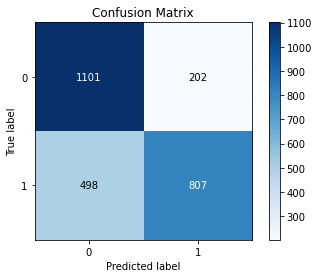

In [121]:
confusion_matrix_values = skplt.metrics.confusion_matrix(y_test, y_predict)
skplt.metrics.plot_confusion_matrix(y_test, y_predict);

### Submission:

In [122]:
random_forest.fit(df_X, df_y)

RandomForestClassifier(max_depth=10, random_state=132)

In [123]:
y_pred = random_forest.predict(df_test)
y_pred = pd.Series(y_pred).map({1:True, 0:False})

In [130]:
submission = pd.DataFrame({'PassengerId': df_test.index, 'Transported': y_pred}).\
    sort_values('PassengerId').\
    reset_index(drop = True)

In [131]:
submission.shape

(4277, 2)

In [128]:
submission.to_csv('JMG_submission.csv') # Export the submission

In [129]:
pd.read_csv('sample_submission.csv').head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
